# **1. Almacenar la información**

Importo y guardo la información obtenida 

In [1]:
import pandas as pd
data = 'C:\\Users\\Fukushima\\Documents\\GitHub\\ProyectoFinalVV\\src\\books.csv'
df = pd.read_csv(data, on_bad_lines='skip')
df.head(10)

C:\Users\Fukushima\AppData\Local\Temp\ipykernel_1252\81729858.py:3: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data, on_bad_lines='skip')


,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,...,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews,PagesNumber
0,1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652.0,4:556485,total:2298124,16,9,Scholastic Inc.,28062,...,eng,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960,NaN,NaN,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870.0,4:604283,total:2358637,1,9,Scholastic Inc.,29770,...,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781,NaN,NaN,NaN
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309.0,4:1513191,total:6587388,1,11,Scholastic Inc,75911,...,eng,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458,NaN,NaN,NaN
3,4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352.0,4:706082,total:2560657,1,11,Scholastic,244,...,eng,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821,NaN,NaN,NaN
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435.0,4:630534,total:2610317,1,5,Scholastic Inc.,37093,...,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848,NaN,NaN,NaN
5,6,Harry Potter and the Goblet of Fire (Harry Pot...,1:9419,734.0,4:606800,total:2431085,28,9,Scholastic,31978,...,eng,J.K. Rowling,4.56,2:24282,5:1612165,NaN,3:178419,NaN,NaN,NaN
6,8,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",1:402,2690.0,4:4650,total:43968,13,9,Scholastic,166,...,eng,J.K. Rowling,4.78,2:283,5:37432,0439682584,3:1201,NaN,NaN,NaN
7,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",1:0,152.0,4:7,total:28,26,4,Nimble Books,1,...,en-US,W. Frederick Zimmerman,3.79,2:5,5:10,0976540606,3:6,NaN,NaN,NaN
8,10,"Harry Potter Collection (Harry Potter, #1-6)",1:257,3342.0,4:4358,total:30313,12,9,Scholastic,809,...,eng,J.K. Rowling,4.73,2:218,5:24406,0439827604,3:1074,NaN,NaN,NaN
9,12,The Ultimate Hitchhiker's Guide: Five Complete...,1:3443,815.0,4:75683,total:274268,1,11,Gramercy Books,255,...,eng,Douglas Adams,4.37,2:7613,5:157499,0517226952,3:30030,NaN,NaN,NaN


Guardo los datos obtenidos en un DB de SQL

In [3]:
import pandas as pd
from sqlalchemy import create_engine

data = 'C:\\Users\\Fukushima\\Documents\\GitHub\\ProyectoFinalVV\\src\\books.csv'
tabla = 'Libros'
ruta_base_datos = '../data/raw/books.db'

# Leer el archivo CSV
df = pd.read_csv(data, on_bad_lines='skip')

# Verificar columnas duplicadas y eliminar
df.columns = df.columns.str.replace('PagesNumber', 'PagesNumber_dup', 1)

# Crear el motor de la base de datos SQLite
engine = create_engine(f'sqlite:///{ruta_base_datos}')

# Cargar el DataFrame en la base de datos
df.to_sql(tabla, engine, index=False, if_exists='replace')

# Confirmar y cerrar la conexión
engine.dispose()


C:\Users\Fukushima\AppData\Local\Temp\ipykernel_1252\2865693857.py:9: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data, on_bad_lines='skip')


In [4]:
import sqlite3

conexion = sqlite3.connect('C:\\Users\\Fukushima\\Documents\\GitHub\\ProyectoFinalVV\\data\\raw\\books.db')
cursor = conexion.cursor()

query_select = "SELECT * FROM Libros LIMIT 10;"
cursor.execute(query_select)
resultados_select = cursor.fetchall()
print("Consulta SELECT:")
for resultado in resultados_select:
    print(resultado)

conexion.commit()
conexion.close()

Consulta SELECT:
(1, 'Harry Potter and the Half-Blood Prince (Harry Potter, #6)', '1:9896', 652.0, '4:556485', 'total:2298124', 16, 9, 'Scholastic Inc.', 28062, 2006, 'eng', 'J.K. Rowling', 4.57, '2:25317', '5:1546466', None, '3:159960', None, None, None)
(2, 'Harry Potter and the Order of the Phoenix (Harry Potter, #5)', '1:12455', 870.0, '4:604283', 'total:2358637', 1, 9, 'Scholastic Inc.', 29770, 2004, 'eng', 'J.K. Rowling', 4.5, '2:37005', '5:1493113', '0439358078', '3:211781', None, None, None)
(3, "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)", '1:108202', 309.0, '4:1513191', 'total:6587388', 1, 11, 'Scholastic Inc', 75911, 2003, 'eng', 'J.K. Rowling', 4.47, '2:130310', '5:4268227', None, '3:567458', None, None, None)
(4, 'Harry Potter and the Chamber of Secrets (Harry Potter, #2)', '1:11896', 352.0, '4:706082', 'total:2560657', 1, 11, 'Scholastic', 244, 2003, 'eng', 'J.K. Rowling', 4.42, '2:49353', '5:1504505', '0439554896', '3:288821', None, None, None)
(5, 'Harry P

In [5]:
df.shape

(1810605, 21)

In [6]:
df.duplicated().sum()

np.int64(112)

In [7]:
df.isna().sum()

Id                             0
Name                           0
RatingDist1                    0
pagesNumber              1015232
RatingDist4                    0
RatingDistTotal                0
PublishMonth                   0
PublishDay                     0
Publisher                  17466
CountsOfReview                 0
PublishYear                    0
Language                 1565796
Authors                        0
Rating                         0
RatingDist2                    0
RatingDist5                    0
ISBN                        5795
RatingDist3                    0
Description               673976
Count of text reviews    1440613
PagesNumber_dup           795373
dtype: int64

<Axes: >

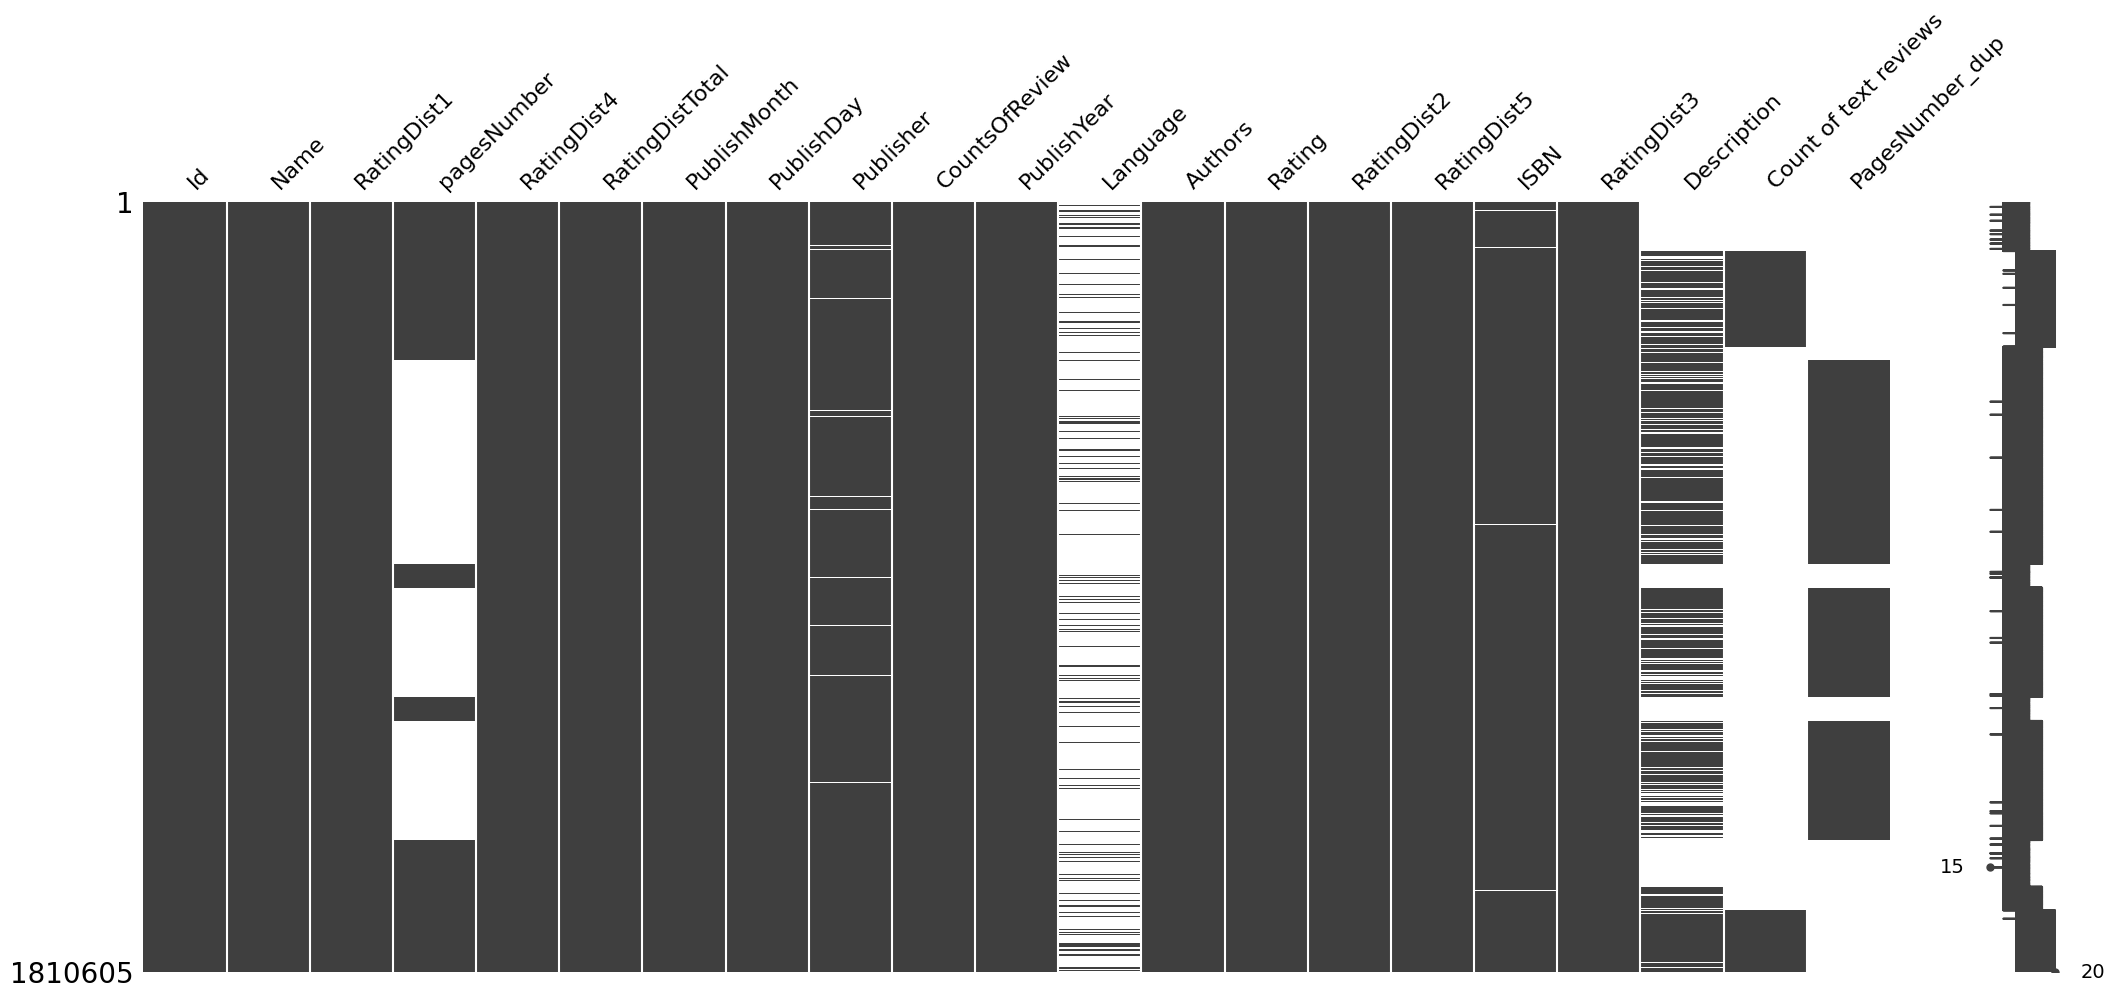

In [8]:
import missingno as msno

msno.matrix(df)

Esta gráfica demuestra que tengo valores nulos en editor/a, lenguaje y el ISBN, pero son datos que al momento de hacer el eda los eliminaré porque no me son utiles para lo que quiero hacer